In [131]:
from os.path import dirname, abspath, join
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

file = '2020-02-23-21-36-17.bag'

mpc_data_file = '/home/marcel/ros_ws/analytics_ws/src/performance_monitor/data/acceleration_data2.csv'

dirPath = abspath(dirname(''))
image_file = join(join(join(dirname(dirPath), 'data'),'images'), file+'.png')
data_file = file+'.csv'

data_path = join(join(dirname(dirPath),'data'), data_file)

with open(data_path, 'r') as f:
    data_raw = pd.read_csv(f)
    
with open(mpc_data_file) as f:
    data_mpc = pd.read_csv(f)

with open(join(join(dirname(dirPath),'data'), 'path.pkl'), 'rb') as f:
    path = pickle.load(f)

def moving_avg(poses, n):
    N = int(len(poses)/n)
    n = N
    moving_avg = []
    tmp = []
    for i in range(len(poses)):
        tmp.append(poses[i])
        if(i >= N):
            moving_avg.append(np.mean(tmp))
            tmp = []
            N = n+N
    return moving_avg

data_raw.tail(10)

,time,speed,x_pos,y_pos,deviation,x_lin_acc,y_lin_acc,z_lin_acc
7687,1.582490e+09,1.229,-1.356574,-2.106030,0.363288,0.136468,0.475244,10.176451
7688,1.582490e+09,1.411,-1.356574,-2.106030,0.363288,0.079008,0.544675,10.043573
7689,1.582490e+09,1.175,-1.371789,-2.164308,0.389810,0.044292,0.532704,9.802958
7690,1.582490e+09,1.175,-1.371789,-2.164308,0.389810,0.044292,0.532704,9.802958
7691,1.582490e+09,1.221,-1.371789,-2.164308,0.389810,0.089782,0.392645,9.750287
7692,1.582490e+09,1.767,-1.371789,-2.164308,0.389810,-0.084993,0.470456,9.492913
7693,1.582490e+09,1.418,-1.371789,-2.164308,0.389810,-0.087387,0.673961,9.090691
7694,1.582490e+09,1.168,-1.371789,-2.164308,0.389810,-0.089782,0.600938,8.990135
7695,1.582490e+09,1.320,-1.371789,-2.164308,0.389810,-0.086190,0.636851,9.460591
7696,1.582490e+09,2.071,-1.371789,-2.164308,0.389810,-0.022745,0.701494,9.536008


In [133]:
time_mpc = data_mpc['rostime']
time_ = data_raw['time']

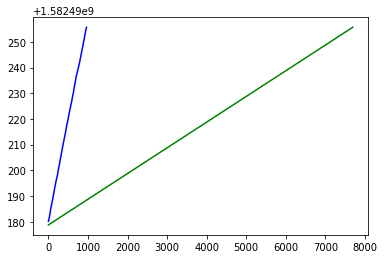

In [134]:
plt.plot(time_mpc, 'b')
plt.plot(time_, 'g')

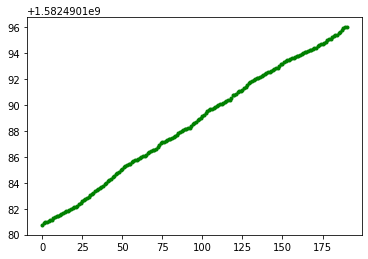

In [115]:
plt.plot(data_mpc['rostime'], 'g.')

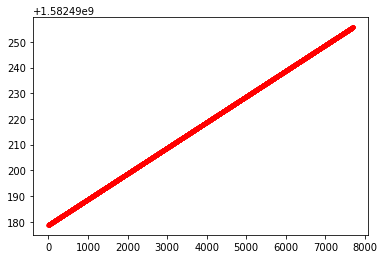

In [135]:
plt.plot(time_, '.r')

In [136]:
data_raw['time'][100]

1582490179.7383358

In [142]:
data_mpc.head(10)

,rostime,an,an_nl,at
0,1.582490e+09,0.364590,0.365467,0.632855
1,1.582490e+09,0.661829,0.664482,0.087761
2,1.582490e+09,0.820777,0.825973,0.159637
3,1.582490e+09,0.745185,0.749865,0.228850
4,1.582490e+09,0.819486,0.826261,0.278444
5,1.582490e+09,0.626942,0.629858,-0.381873
6,1.582490e+09,0.762917,0.769616,-0.114410
7,1.582490e+09,0.238031,0.238108,-0.747158
8,1.582490e+09,0.266772,0.266888,-0.733050
9,1.582490e+09,0.722610,0.728964,-0.204887


In [137]:
len(time_)

7697

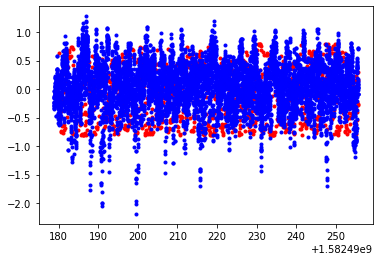

In [141]:
plt.plot(data_mpc['rostime'], data_mpc['at'], '.r')
plt.plot(time_, data_raw['x_lin_acc'], '.b')

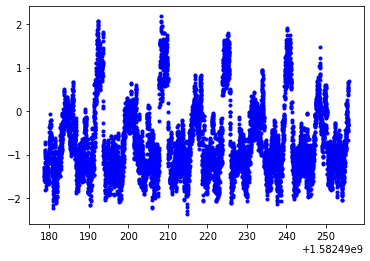

In [139]:
plt.plot(time_, data_raw['y_lin_acc'], '.b')